<a href="https://colab.research.google.com/github/elisaramoss/analise_BanVic/blob/main/Analise_BanVic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio de Engenharia de Analytics/Análise de Dados 2024-9


Neste desafio você vai gerar um relatório com indicadores de performance para responder às demandas do BanVic. Para isso você deve criar indicadores de negócio e sugerir como a empresa pode agir em cima deles para melhorar seus resultados. Você pode usar as ferramentas que tiver maior facilidade ou achar mais interessante tais como Excel, Google Sheets, Python, R, dbt (data build tool) etc.  Lembre que este relatório será apresentado para a CEO, então você deve formatá-lo de forma profissional e objetiva.


In [ ]:
#Importando as bibliotecas necessários
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
import pytz


#Importanto as bibliotecas





#Agências

In [ ]:
#Carregar os dados da Agência BanVic

df_agencia = pd.read_csv("https://raw.githubusercontent.com/elisaramoss/analise_BanVic/main/banvic_data/agencias.csv", index_col='cod_agencia')

df_agencia.head(10)

,nome,endereco,cidade,uf,data_abertura,tipo_agencia
cod_agencia,,,,,,
7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física
5,Agência Porto Alegre,"Av. Bento Gonçalves, 1924 - Partenon, Porto Al...",Porto Alegre,RS,2013-12-01,Física
6,Agência Rio de Janeiro,"R. Sen. Dantas, 15 - Centro, Rio de Janeiro - ...",Rio de Janeiro,RJ,2015-04-01,Física
8,Agência Jardins,"Av. Brg. Faria Lima, 2491 - Jardim Paulistano,...",São Paulo,SP,2018-01-09,Física
9,Agência Florianópolis,"Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...",Florianópolis,SC,2019-10-09,Física


In [ ]:
# Analisei as distribuições de região
agencia_fisica = df_agencia[df_agencia['tipo_agencia'] == 'Física']
agencia_por_regiao =agencia_fisica['uf'].value_counts(normalize=True)

print(f"Quantidade de Agências: {len(df_agencia)}")
print(f"Quantidade de Agências Físicas: {len(agencia_fisica)}")

#Porcentagem das agencias físicas po uf
print(f"Quantidade de Agências por região:")
print(agencia_por_regiao)


Quantidade de Agências: 10
Quantidade de Agências Físicas: 9
Quantidade de Agências por região:
uf
SP    0.555556
RS    0.111111
RJ    0.111111
SC    0.111111
PE    0.111111
Name: proportion, dtype: float64


A partir da análise das distribuições das agências do Banco pelo Brasil, percebe-se que mais de 50% das agências físicas se encontram no Estado de São Paulo.

Tratamento do dados Agências


In [ ]:
# Separando o endereço em logradouro, número de logradouro e bairro.
# Cidade e UF já possuem colunas próprias
df_agencia['logradouro'] = df_agencia.endereco.apply(lambda x: x.split(',')[0])
df_agencia['no_logradouro'] = df_agencia.endereco.apply(lambda x: x.split(',')[1].split('-')[0])
df_agencia['bairro'] = df_agencia.endereco.apply(lambda x: x.split(',')[1].split('-')[1])
df_agencia = df_agencia.drop('endereco', axis=1)
df_agencia['nome_completo'] = df_agencia.nome + ' - ' + df_agencia.cidade + '/' + df_agencia.uf
df_agencia



,nome,cidade,uf,data_abertura,tipo_agencia,logradouro,no_logradouro,bairro,nome_completo
cod_agencia,,,,,,,,,
7,Agência Digital,São Paulo,SP,2015-08-01,Digital,Av. Paulista,1436,Cerqueira César,Agência Digital - São Paulo/SP
1,Agência Matriz,São Paulo,SP,2010-01-01,Física,Av. Paulista,1436,Cerqueira César,Agência Matriz - São Paulo/SP
2,Agência Tatuapé,São Paulo,SP,2010-06-14,Física,Praça Sílvio Romero,158,Tatuapé,Agência Tatuapé - São Paulo/SP
3,Agência Campinas,Campinas,SP,2012-03-04,Física,Av. Francisco Glicério,895,Vila Lidia,Agência Campinas - Campinas/SP
4,Agência Osasco,Osasco,SP,2013-11-06,Física,Av. Antônio Carlos Costa,1000,Bela Vista,Agência Osasco - Osasco/SP
5,Agência Porto Alegre,Porto Alegre,RS,2013-12-01,Física,Av. Bento Gonçalves,1924,Partenon,Agência Porto Alegre - Porto Alegre/RS
6,Agência Rio de Janeiro,Rio de Janeiro,RJ,2015-04-01,Física,R. Sen. Dantas,15,Centro,Agência Rio de Janeiro - Rio de Janeiro/RJ
8,Agência Jardins,São Paulo,SP,2018-01-09,Física,Av. Brg. Faria Lima,2491,Jardim Paulistano,Agência Jardins - São Paulo/SP
9,Agência Florianópolis,Florianópolis,SC,2019-10-09,Física,Av. Jorn. Rubéns de Arruda Ramos,1280,Centro,Agência Florianópolis - Florianópolis/SC


In [ ]:
#Vamos avaliar as agências por quantidade de meses para análises futuras.

df_agencia['data_abertura_agencia'] = pd.to_datetime(df_agencia.data_abertura,format='%Y-%m-%d')
now = datetime.now()
df_agencia['tempo_agencia_meses'] = df_agencia['data_abertura_agencia'].apply(lambda x: relativedelta(now,x).months + relativedelta(now,x).years*12)
df_agencia[['data_abertura_agencia','tempo_agencia_meses']].describe().T
df_agencia = df_agencia.drop('data_abertura', axis=1)
df_agencia

,nome,cidade,uf,tipo_agencia,logradouro,no_logradouro,bairro,nome_completo,data_abertura_agencia,tempo_agencia_meses
cod_agencia,,,,,,,,,,
7,Agência Digital,São Paulo,SP,Digital,Av. Paulista,1436,Cerqueira César,Agência Digital - São Paulo/SP,2015-08-01,107
1,Agência Matriz,São Paulo,SP,Física,Av. Paulista,1436,Cerqueira César,Agência Matriz - São Paulo/SP,2010-01-01,174
2,Agência Tatuapé,São Paulo,SP,Física,Praça Sílvio Romero,158,Tatuapé,Agência Tatuapé - São Paulo/SP,2010-06-14,169
3,Agência Campinas,Campinas,SP,Física,Av. Francisco Glicério,895,Vila Lidia,Agência Campinas - Campinas/SP,2012-03-04,148
4,Agência Osasco,Osasco,SP,Física,Av. Antônio Carlos Costa,1000,Bela Vista,Agência Osasco - Osasco/SP,2013-11-06,128
5,Agência Porto Alegre,Porto Alegre,RS,Física,Av. Bento Gonçalves,1924,Partenon,Agência Porto Alegre - Porto Alegre/RS,2013-12-01,127
6,Agência Rio de Janeiro,Rio de Janeiro,RJ,Física,R. Sen. Dantas,15,Centro,Agência Rio de Janeiro - Rio de Janeiro/RJ,2015-04-01,111
8,Agência Jardins,São Paulo,SP,Física,Av. Brg. Faria Lima,2491,Jardim Paulistano,Agência Jardins - São Paulo/SP,2018-01-09,78
9,Agência Florianópolis,Florianópolis,SC,Física,Av. Jorn. Rubéns de Arruda Ramos,1280,Centro,Agência Florianópolis - Florianópolis/SC,2019-10-09,57


In [ ]:
df_agencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 7 to 10
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   nome                   10 non-null     object        
 1   cidade                 10 non-null     object        
 2   uf                     10 non-null     object        
 3   tipo_agencia           10 non-null     object        
 4   logradouro             10 non-null     object        
 5   no_logradouro          10 non-null     object        
 6   bairro                 10 non-null     object        
 7   nome_completo          10 non-null     object        
 8   data_abertura_agencia  10 non-null     datetime64[ns]
 9   tempo_agencia_meses    10 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 880.0+ bytes


##Visualização dos dados Agencias

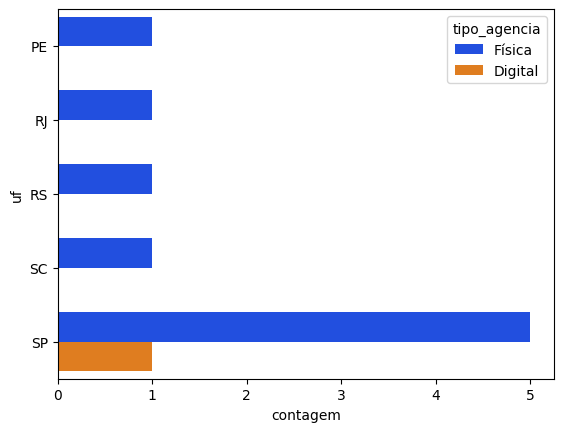

In [ ]:
#contagem de agências
df_cont_agencia = df_agencia.groupby(['uf','tipo_agencia']).size().reset_index(name='contagem')


sns.barplot(data=df_cont_agencia,
              y = 'uf',
            x = 'contagem',
             hue = 'tipo_agencia',
             #dodge="auto",
             palette='bright')

plt.show()


#Clientes

In [ ]:
#Carregando os dados dos clientes do banco

df_clientes = pd.read_csv("https://raw.githubusercontent.com/elisaramoss/analise_BanVic/main/banvic_data/clientes.csv")

df_clientes.head(10)

,cod_cliente,primeiro_nome,ultimo_nome,email,tipo_cliente,data_inclusao,cpfcnpj,data_nascimento,endereco,cep
0,28,Sabrina,Dias,moreiraemanuelly@example.org,PF,2017-04-03 16:11:00 UTC,357.081.496-39,2006-08-11,Praia de Duarte Vila Piratininga 81327-166 Fer...,95140-704
1,674,Luiz Felipe,Dias,pedroferreira@example.org,PF,2021-02-10 13:27:00 UTC,085.196.374-93,1995-10-11,"Avenida da Rosa, 654 João Paulo Ii 20295449 Nu...",76516-765
2,693,Renan,Dias,ogomes@example.net,PF,2020-01-21 13:12:00 UTC,783.416.059-10,1948-11-19,Jardim de Rodrigues Ipiranga 14161-477 Duarte ...,51779625
3,743,Clara,Dias,rafaelcorreia@example.org,PF,2019-05-06 11:39:00 UTC,589.237.610-95,1978-01-27,"Colônia Thomas Silva, 9 Tupi B 15771-946 Ferna...",19615792
4,769,André,Dias,danilo33@example.org,PF,2017-01-07 14:53:00 UTC,459.608.721-02,1990-08-25,"Rua Correia, 889 Diamante 59123250 Aragão / RS",01672838
5,824,Heloísa,Dias,alanadias@example.org,PF,2016-01-07 12:26:00 UTC,536.981.240-33,1967-05-12,"Favela de da Mata, 3 Conjunto Novo Dom Bosco 7...",07814-131
6,884,Maria Julia,Dias,alvesmariana@example.net,PF,2017-08-06 11:01:00 UTC,150.438.926-33,1950-12-10,"Esplanada Maria Luiza Ribeiro, 4 Conjunto Cali...",90221-380
7,899,Arthur,Dias,castropedro-lucas@example.net,PF,2021-10-17 13:00:00 UTC,509.481.762-02,1953-02-26,"Ladeira Elisa da Rocha, 69 João Pinheiro 13964...",44875-244
8,908,Vitor Gabriel,Dias,acardoso@example.com,PF,2021-04-02 10:22:00 UTC,158.406.379-39,1948-03-25,"Passarela Lucca Castro, 73 Vila Paris 99268696...",42603-833
9,945,Caio,Dias,moraesmarina@example.org,PF,2016-05-10 13:56:00 UTC,975.860.431-75,1955-06-11,"Fazenda Emanuel Gomes, 6 Cruzeiro 29428-910 No...",23176352


In [ ]:
print(f"Quantidade de clientes: {df_clientes.shape[0]}")

Quantidade de clientes: 998


Tratamento dos dados Clietes

In [ ]:
# Convertendo as datas no formato correto
df_clientes['data_nascimento_parsed'] = pd.to_datetime(df_clientes.data_nascimento, format='%Y-%m-%d').dt.tz_localize(None)
df_clientes['data_inclusao_parsed'] = pd.to_datetime(df_clientes.data_inclusao).dt.tz_localize(None)

# Calculando valores de tempo
df_clientes['tempo_inclusao_anos'] = df_clientes.data_inclusao_parsed.apply(lambda x: (pd.to_datetime('now').tz_localize(None) - x).days/365).round()
df_clientes['idade_cliente'] = df_clientes.data_nascimento_parsed.apply(lambda x: (pd.to_datetime('now') - x).days/365).round()

df_clientes[['tempo_inclusao_anos','data_inclusao_parsed','data_nascimento_parsed','idade_cliente']]

,tempo_inclusao_anos,data_inclusao_parsed,data_nascimento_parsed,idade_cliente
0,7.0,2017-04-03 16:11:00,2006-08-11,18.0
1,3.0,2021-02-10 13:27:00,1995-10-11,29.0
2,4.0,2020-01-21 13:12:00,1948-11-19,76.0
3,5.0,2019-05-06 11:39:00,1978-01-27,47.0
4,8.0,2017-01-07 14:53:00,1990-08-25,34.0
...,...,...,...,...
993,5.0,2019-05-02 11:22:00,1966-03-06,58.0
994,7.0,2017-06-08 11:13:00,1971-07-20,53.0
995,10.0,2014-03-18 10:30:00,1944-06-03,80.0
996,4.0,2020-12-16 15:14:00,1943-12-12,81.0


In [ ]:
# Retirando os hifens do CEP dos clientes
df_clientes['cep'] = df_clientes.cep.apply(lambda x: x.replace('-',''))
df_clientes.cep.sample(10)

529    13347642
663    48067920
695    58810090
243    73044289
856    92815998
144    22473392
763    60999280
693    16889847
710    87757995
545    86720928
Name: cep, dtype: object

#Colaboradores

In [ ]:
#carregando os dados dos colaboradores

df_colaboradores = pd.read_csv("https://raw.githubusercontent.com/elisaramoss/analise_BanVic/main/banvic_data/colaboradores.csv")

df_colaboradores.head(10)

,cod_colaborador,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep
0,14,Paulo,Dias,melissalopes@example.net,847.210.695-02,1974-04-24,"Lagoa de Rodrigues, 62 Zilah Sposito 37328-273...",27275674
1,19,Luiz Fernando,Dias,pcunha@example.net,820.415.963-33,1994-07-10,"Ladeira de Moreira, 82 Jardim Atlântico 27617-...",50013962
2,32,Vitor Hugo,Dias,aragaonicolas@example.net,936.172.548-37,1986-12-18,Área Sophie Moreira Maria Virgínia 71941-111 S...,08955-215
3,88,João Gabriel,Lima,luiz-otaviorezende@example.org,967.082.451-67,1994-10-19,"Trevo Murilo Ramos, 92 São Benedito 73615-597 ...",24224-305
4,39,Maria Eduarda,Melo,joao-pedro72@example.com,857.496.210-49,1996-03-01,"Parque de Moura, 65 Granja Werneck 67769059 da...",96896390
5,41,Olivia,Costa,sabrina59@example.com,190.768.435-20,1966-01-30,"Favela Rocha, 94 Laranjeiras 92500120 Viana / GO",90019993
6,45,Laura,Cunha,lviana@example.org,217.583.096-95,1977-02-07,"Lagoa Benício Moura, 5 Vila Paraíso 50235854 d...",19415-341
7,100,Lavínia,Cunha,noahmoraes@example.com,062.937.158-02,1975-03-24,"Colônia Lima, 83 Flamengo 36172-665 da Mota / SE",74890752
8,16,Benjamin,Gomes,vjesus@example.org,718.950.436-20,1963-12-21,"Conjunto Gomes, 888 Céu Azul 76308-427 Lopes d...",29604844
9,46,Alana,Gomes,samuel76@example.com,768.134.950-20,1977-07-16,Fazenda Emilly Costa Campo Alegre 55916-800 da...,88161-168


In [ ]:
print(f"Quantidade de colaboradores: {df_colaboradores.shape[0]}")

Quantidade de colaboradores: 100


In [ ]:
df_contas_interm = pd.merge(df_colaborador_agencia, df_agencia.nome_completo, on='cod_agencia', how='left')
df_colaboradores = pd.merge(df_colaboradores, df_contas_interm[['cod_colaborador','nome_completo','cod_agencia']], on='cod_colaborador', how='left')
df_colaboradores.sample(10)


,cod_colaborador,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep,nome_completo,cod_agencia
82,78,João Felipe,Ferreira,fernando53@example.org,369.428.710-87,1976-09-12,"Favela Barros, 28 Nazare 98329-395 Caldeira do...",83982-409,Agência Campinas - Campinas/SP,3
65,11,Camila,Moreira,enzo-gabrielduarte@example.com,263.589.174-55,1970-03-30,"Lago Evelyn Teixeira, 7 Pantanal 68026-096 Car...",92857-785,Agência Florianópolis - Florianópolis/SC,9
57,97,Nicolas,Cardoso,costajoao-miguel@example.net,897.605.341-93,1969-04-22,"Vereda Freitas, 46 Minas Brasil 80891-631 da M...",21980-775,Agência Rio de Janeiro - Rio de Janeiro/RJ,6
47,24,Vitória,Vieira,pedro-henrique56@example.org,572.340.961-16,1989-06-13,"Campo Bruno Melo, 3 São Jorge 1ª Seção 04133-5...",92847600,Agência Matriz - São Paulo/SP,1
50,90,Cauê,Almeida,wcampos@example.org,176.084.239-78,1993-12-03,"Vale de Costa, 62 Acaiaca 71168-130 Gonçalves ...",61301741,Agência Florianópolis - Florianópolis/SC,9
30,68,João Miguel,Souza,icarvalho@example.com,627.134.095-43,1962-10-14,"Passarela Natália da Rosa, 24 São Pedro 65884-...",98839-500,Agência Jardins - São Paulo/SP,8
20,31,Joaquim,Pires,laispeixoto@example.org,104.263.875-62,1978-06-12,"Loteamento de Peixoto, 42 Aparecida 7ª Seção 7...",51569-010,Agência Matriz - São Paulo/SP,1
21,43,Marcelo,Ramos,heitor34@example.org,279.438.056-74,1968-11-13,"Praia Daniela Nunes, 10 Vila Trinta E Um De Ma...",74002-728,Agência Porto Alegre - Porto Alegre/RS,5
28,82,Mirella,Sales,pedro-miguelda-rocha@example.org,097.435.216-07,1967-11-13,Loteamento Monteiro Conjunto Bonsucesso 77655-...,62738233,Agência Recife - Recife/PE,10
75,55,Ana Sophia,da Mota,pedro-henrique85@example.com,205.719.486-85,1997-05-16,"Conjunto de Nascimento, 138 Marçola 26018227 V...",79292091,Agência Porto Alegre - Porto Alegre/RS,5


Tratamento dos dados dos colaboradores

In [ ]:
df_colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_colaborador  100 non-null    int64 
 1   primeiro_nome    100 non-null    object
 2   ultimo_nome      100 non-null    object
 3   email            100 non-null    object
 4   cpf              100 non-null    object
 5   data_nascimento  100 non-null    object
 6   endereco         100 non-null    object
 7   cep              100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


###KPI Eficiência da Agência (Clientes por Colaboradores)
Avaliação  da quantidade de colaboradores de cada agência e relacionar com a qauantidade de contas que cada agência possui.

Desta forma, encontramos um indicador de eficiência.

<ipython-input-66-fd8f869aa633>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df_estatistica_eficiencia.kpi_eficiencia_agencia,


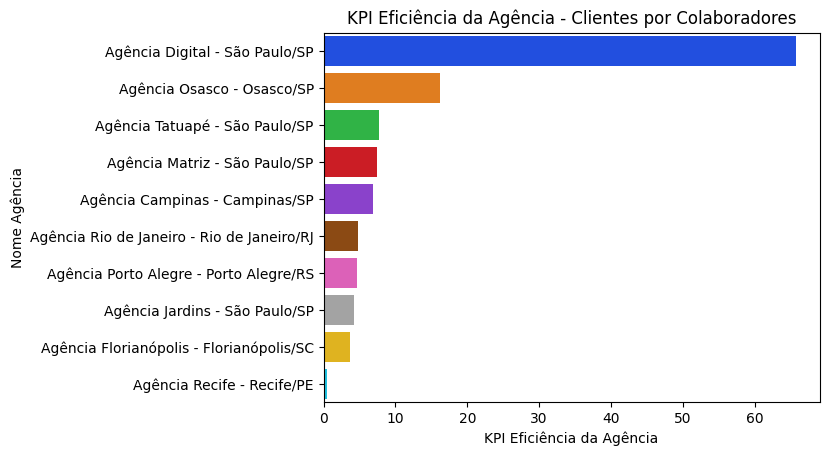

In [ ]:
#conta colaboradores por agência
df_estatistica_eficiencia = df_colaboradores[['cod_colaborador','nome_completo']].groupby('nome_completo').count()
df_estatistica_eficiencia = df_estatistica_eficiencia.rename(columns = {'cod_colaborador': 'qtd_colaboradores'})

#conta contas por agência
df_estatistica_eficiencia['qtd_contas'] = df_contas_total[['nome_completo','num_conta']] .groupby('nome_completo').count()

#calcula indicador de eficiência
df_estatistica_eficiencia['kpi_eficiencia_agencia'] = df_estatistica_eficiencia.qtd_contas / df_estatistica_eficiencia.qtd_colaboradores
df_estatistica_eficiencia = df_estatistica_eficiencia.sort_values(by='kpi_eficiencia_agencia', ascending=False)
sns.barplot(x = df_estatistica_eficiencia.kpi_eficiencia_agencia,
            y =df_estatistica_eficiencia.index,
             palette='bright')


plt.title('KPI Eficiência da Agência - Clientes por Colaboradores')
plt.xlabel('KPI Eficiência da Agência')
plt.ylabel('Nome Agência')
plt.show()

#Colaborador por Agência

In [ ]:
#Carregando os dados dos colaboradores por agência

df_colaborador_agencia = pd.read_csv("https://raw.githubusercontent.com/elisaramoss/analise_BanVic/main/banvic_data/colaborador_agencia.csv")

print(f"Quantidade de colaboradores por agência: {df_colaborador_agencia.shape[0]}")

# Contando o número de colaboradores por agência
colaboradores_por_agencia = df_colaborador_agencia.groupby('cod_agencia').size()

print("\n")
# Exibindo a contagem de colaboradores por agência
print(f"Quantidade de colaboradores por agência:")
print(colaboradores_por_agencia)
df_colaborador_agencia.head(10)


Quantidade de colaboradores por agência: 100


Quantidade de colaboradores por agência:
cod_agencia
1     16
2     13
3     11
4      4
5     13
6     11
7      7
8      7
9      8
10    10
dtype: int64


,cod_colaborador,cod_agencia
0,7,1
1,13,1
2,14,1
3,23,1
4,24,1
5,30,1
6,31,1
7,34,1
8,42,1
9,58,1


Interprentando a descrição acima, infere-se que a Agência Matriz em SP possui o maior número de colaboradores,em seguida as agências de Tatuapé em SP e Porto Alegre	RS.

### Quantidade de colaboradores por agência

In [ ]:
df_colaboradores[['cod_colaborador','nome_completo']].groupby(['nome_completo']).count()

,cod_colaborador
nome_completo,
Agência Campinas - Campinas/SP,11
Agência Digital - São Paulo/SP,7
Agência Florianópolis - Florianópolis/SC,8
Agência Jardins - São Paulo/SP,7
Agência Matriz - São Paulo/SP,16
Agência Osasco - Osasco/SP,4
Agência Porto Alegre - Porto Alegre/RS,13
Agência Recife - Recife/PE,10
Agência Rio de Janeiro - Rio de Janeiro/RJ,11


##Gráfico

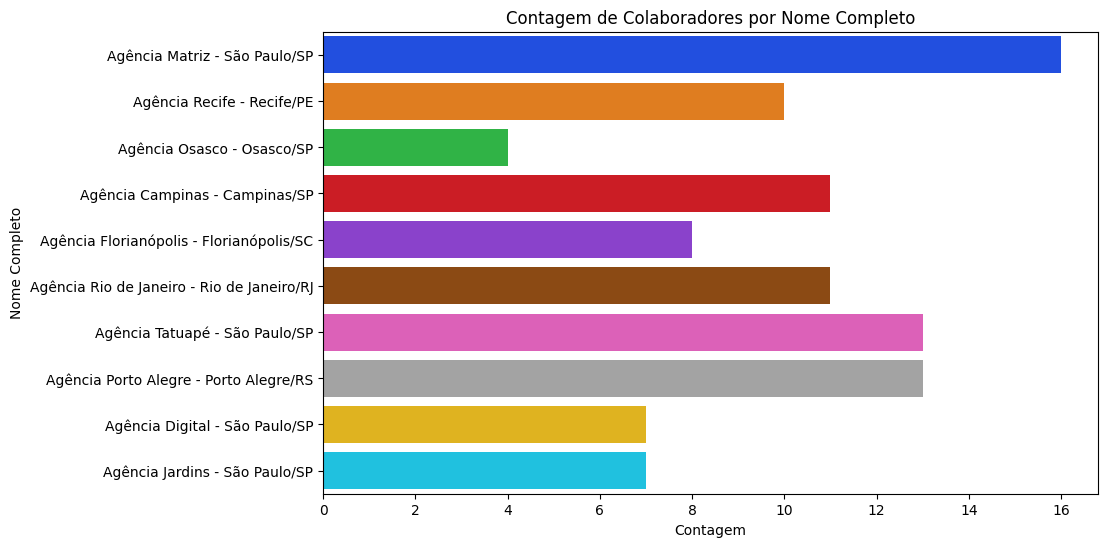

In [ ]:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_colaboradores, y='nome_completo', hue='nome_completo',  palette='bright', legend=False)
    plt.title('Contagem de Colaboradores por Nome Completo')
    plt.xlabel('Contagem')
    plt.ylabel('Nome Completo')
    plt.show()

#Contas

In [ ]:
#Carregando os dados das contas dos clientes

df_contas = pd.read_csv("https://raw.githubusercontent.com/elisaramoss/analise_BanVic/main/banvic_data/contas.csv")

print(f"Quantidade de contas: {df_contas.shape[0]}")

df_contas.head(10)

Quantidade de contas: 999


,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,data_abertura,saldo_total,saldo_disponivel,data_ultimo_lancamento
0,53,53,1,7,PF,2011-05-24 15:30:00 UTC,2984.7615,2814.67,2019-07-02 11:03:46 UTC
1,190,190,1,7,PF,2014-10-17 14:48:00 UTC,4262.4322,4191.86,2021-03-25 12:00:15 UTC
2,191,191,1,7,PF,2013-03-23 14:14:00 UTC,3266.5680,3080.71,2016-09-09 23:34:15 UTC
3,203,203,1,7,PF,2016-08-03 16:13:00 UTC,21241.5424,19461.56,2022-12-28 07:58:24 UTC
4,254,254,1,7,PF,2012-10-24 13:48:00 UTC,13335.6966,13197.54,2013-12-20 22:20:00 UTC
5,306,306,1,7,PF,2012-05-23 12:11:00 UTC,22997.4738,21677.88,2016-10-05 03:14:36 UTC
6,472,472,1,7,PF,2022-08-07 12:08:00 UTC,4178.4237,4183.68,2022-12-30 00:00:00.67516 UTC
7,520,520,1,7,PF,2019-11-03 16:26:00 UTC,1809.8087,1288.51,2022-12-29 23:59:59.753932 UTC
8,739,739,1,7,PF,2014-02-26 12:20:00 UTC,45.7691,616.79,2022-12-29 23:59:59.789361 UTC
9,509,509,1,13,PF,2012-01-20 11:56:00 UTC,19159.7952,19863.76,2016-06-09 22:25:04 UTC


Como foi observado anteriormente existem apenas 988 clientes, mas o banco possui 999 contas, dessa forma, podemos inferir que pelo menos um cliente há mais de uma conta cadastrada.

Tratamento dos dados das contas

In [ ]:
# transformando a data de último lançamento em formato data
df_contas['data_ultimo_lancamento_conta'] = pd.to_datetime(df_contas.data_ultimo_lancamento,
                                                            format='mixed')
df_contas['data_abertura_conta'] = pd.to_datetime(df_contas.data_abertura,
                                                            format='mixed')
df_contas = df_contas.drop('data_ultimo_lancamento', axis=1)
df_contas = df_contas.drop('data_abertura', axis=1)

In [ ]:
df_contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   num_conta                     999 non-null    int64              
 1   cod_cliente                   999 non-null    int64              
 2   cod_agencia                   999 non-null    int64              
 3   cod_colaborador               999 non-null    int64              
 4   tipo_conta                    999 non-null    object             
 5   saldo_total                   999 non-null    float64            
 6   saldo_disponivel              999 non-null    float64            
 7   data_ultimo_lancamento_conta  999 non-null    datetime64[ns, UTC]
 8   data_abertura_conta           999 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(2), int64(4), object(1)
memory usage: 70.4+ KB


In [ ]:
hoje = datetime.now(pytz.utc)
hoje = hoje.astimezone(pytz.timezone('UTC'))


df_contas['dias_inativo'] = (hoje - df_contas.data_ultimo_lancamento_conta).dt.days

df_contas[['tipo_conta','data_ultimo_lancamento_conta','dias_inativo']]

,tipo_conta,data_ultimo_lancamento_conta,dias_inativo
0,PF,2019-07-02 11:03:46+00:00,1842
1,PF,2021-03-25 12:00:15+00:00,1210
2,PF,2016-09-09 23:34:15+00:00,2867
3,PF,2022-12-28 07:58:24+00:00,567
4,PF,2013-12-20 22:20:00+00:00,3861
...,...,...,...
994,PF,2022-12-30 00:00:00.319185+00:00,565
995,PF,2022-12-29 23:59:59.964121+00:00,565
996,PF,2022-12-30 00:00:00.966349+00:00,565
997,PF,2022-12-30 00:00:00.607818+00:00,565


Extraindo os nomes das agências para esta tabela

In [ ]:
df_contas_interm = pd.merge(df_contas, df_agencia, on='cod_agencia', how='left')
df_contas_total = pd.merge(df_contas_interm, df_colaboradores, on='cod_colaborador', how='left')

print(df_contas.shape,df_colaboradores.shape,df_agencia.shape,df_contas_total.shape)
df_contas_total

(999, 10) (100, 8) (10, 10) (999, 27)


,num_conta,cod_cliente,cod_agencia,cod_colaborador,tipo_conta,saldo_total,saldo_disponivel,data_ultimo_lancamento_conta,data_abertura_conta,dias_inativo,...,nome_completo,data_abertura_agencia,tempo_agencia_meses,primeiro_nome,ultimo_nome,email,cpf,data_nascimento,endereco,cep
0,53,53,1,7,PF,2984.7615,2814.67,2019-07-02 11:03:46+00:00,2011-05-24 15:30:00+00:00,1842,...,Agência Matriz - São Paulo/SP,2010-01-01,174,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328
1,190,190,1,7,PF,4262.4322,4191.86,2021-03-25 12:00:15+00:00,2014-10-17 14:48:00+00:00,1210,...,Agência Matriz - São Paulo/SP,2010-01-01,174,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328
2,191,191,1,7,PF,3266.5680,3080.71,2016-09-09 23:34:15+00:00,2013-03-23 14:14:00+00:00,2867,...,Agência Matriz - São Paulo/SP,2010-01-01,174,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328
3,203,203,1,7,PF,21241.5424,19461.56,2022-12-28 07:58:24+00:00,2016-08-03 16:13:00+00:00,567,...,Agência Matriz - São Paulo/SP,2010-01-01,174,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328
4,254,254,1,7,PF,13335.6966,13197.54,2013-12-20 22:20:00+00:00,2012-10-24 13:48:00+00:00,3861,...,Agência Matriz - São Paulo/SP,2010-01-01,174,Letícia,Peixoto,igornovaes@example.net,396.071.582-02,1994-09-10,"Ladeira da Costa, 86 Conjunto Bonsucesso 59864...",92465328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,466,466,10,8,PF,7847.4165,9351.63,2022-12-30 00:00:00.319185+00:00,2022-10-26 14:13:00+00:00,565,...,Agência Recife - Recife/PE,2021-10-09,33,Vitor Gabriel,Caldeira,csilva@example.net,853.624.091-15,1973-07-11,"Jardim da Luz, 96 Rio Branco 42420423 da Mata ...",66925-534
995,764,764,10,8,PF,65495.1872,64823.14,2022-12-29 23:59:59.964121+00:00,2022-09-08 11:06:00+00:00,565,...,Agência Recife - Recife/PE,2021-10-09,33,Vitor Gabriel,Caldeira,csilva@example.net,853.624.091-15,1973-07-11,"Jardim da Luz, 96 Rio Branco 42420423 da Mata ...",66925-534
996,488,488,10,18,PF,8663.6081,6836.57,2022-12-30 00:00:00.966349+00:00,2022-07-16 10:16:00+00:00,565,...,Agência Recife - Recife/PE,2021-10-09,33,Maria Vitória,Duarte,almeidacaroline@example.net,047.836.592-65,1963-12-24,"Setor Thiago da Rocha, 9 Independência 55260-9...",29043497
997,395,395,10,95,PF,23156.2065,21578.33,2022-12-30 00:00:00.607818+00:00,2022-12-01 15:27:00+00:00,565,...,Agência Recife - Recife/PE,2021-10-09,33,Juliana,Cavalcanti,gomesmanuela@example.org,309.764.251-06,1982-05-18,Trevo de Duarte Nossa Senhora Do Rosário 41440...,52427-851


###Quantidade de contas por agência

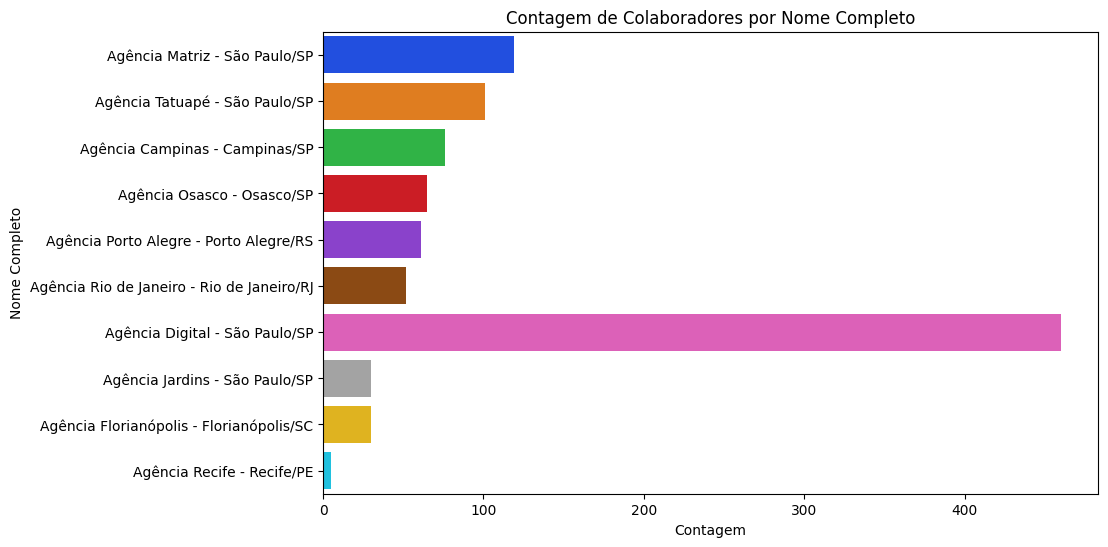

In [ ]:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_contas_total, y='nome_completo', hue='nome_completo',  palette='bright', legend=False)
    plt.title('Contagem de Colaboradores por Nome Completo')
    plt.xlabel('Contagem')
    plt.ylabel('Nome Completo')
    plt.show()

###Linha do tempo de Criação de contas

In [ ]:
df_quant_contas = df_contas_total[['data_abertura_conta','num_conta','nome_completo',
                                   'data_abertura_agencia']].sort_values('data_abertura_conta')
df_quant_contas = df_quant_contas.rename(columns = {'nome_completo': 'nome_agencia'})

# calculando ano conta
df_quant_contas['ano_abertura_conta'] = df_quant_contas.data_abertura_conta.dt.year

# calculando ano agência
df_quant_contas['ano_abertura_agencia'] = df_quant_contas.data_abertura_agencia.dt.year


# Calculando quantidade de contas cumulativa
df_quant_contas['qtd_contas'] = None
df_quant_contas['qtd_contas'] = range(1, len(df_quant_contas) + 1)

df_quant_contas.sample(10)

,data_abertura_conta,num_conta,nome_agencia,data_abertura_agencia,ano_abertura_conta,ano_abertura_agencia,qtd_contas
334,2020-08-22 15:21:00+00:00,568,Agência Osasco - Osasco/SP,2013-11-06,2020,2013,690
951,2020-09-07 14:32:00+00:00,44,Agência Jardins - São Paulo/SP,2018-01-09,2020,2018,693
995,2022-09-08 11:06:00+00:00,764,Agência Recife - Recife/PE,2021-10-09,2022,2021,947
898,2019-10-18 14:44:00+00:00,445,Agência Digital - São Paulo/SP,2015-08-01,2019,2015,584
887,2017-10-03 12:41:00+00:00,282,Agência Digital - São Paulo/SP,2015-08-01,2017,2015,374
970,2020-10-23 15:23:00+00:00,652,Agência Florianópolis - Florianópolis/SC,2019-10-09,2020,2019,705
283,2016-01-15 11:42:00+00:00,205,Agência Campinas - Campinas/SP,2012-03-04,2016,2012,232
336,2015-07-01 16:05:00+00:00,852,Agência Osasco - Osasco/SP,2013-11-06,2015,2013,190
136,2014-02-12 15:54:00+00:00,456,Agência Tatuapé - São Paulo/SP,2010-06-14,2014,2010,117
974,2022-10-20 11:04:00+00:00,585,Agência Florianópolis - Florianópolis/SC,2019-10-09,2022,2019,962


In [ ]:
df_anos_agencias = df_quant_contas[['nome_agencia','ano_abertura_agencia','num_conta']].groupby(['nome_agencia','ano_abertura_agencia']).count().sort_values('ano_abertura_agencia')
df_anos_agencias

,,num_conta
nome_agencia,ano_abertura_agencia,
Agência Matriz - São Paulo/SP,2010,119
Agência Tatuapé - São Paulo/SP,2010,101
Agência Campinas - Campinas/SP,2012,76
Agência Osasco - Osasco/SP,2013,65
Agência Porto Alegre - Porto Alegre/RS,2013,61
Agência Digital - São Paulo/SP,2015,460
Agência Rio de Janeiro - Rio de Janeiro/RJ,2015,52
Agência Jardins - São Paulo/SP,2018,30
Agência Florianópolis - Florianópolis/SC,2019,30


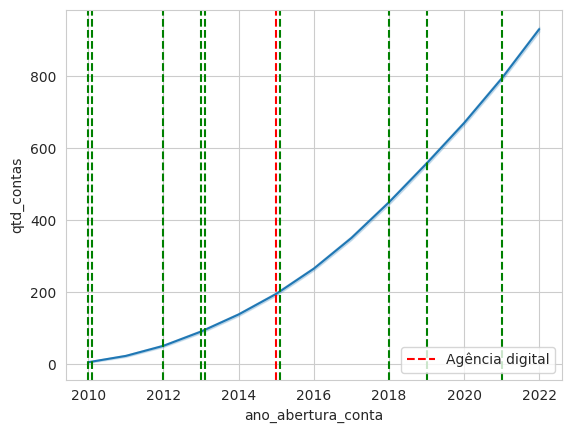

In [ ]:
with sns.axes_style('whitegrid'):
    ax = sns.lineplot(data=df_quant_contas, x='ano_abertura_conta', y='qtd_contas')

    #linhas
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[0], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[0]+0.1, color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[1], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[2], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[2]+0.1, color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[3], color='red', linestyle='--', label='Agência digital')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[3]+0.1, color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[4], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[5], color='green', linestyle='--')
    ax.axvline(x=df_quant_contas.ano_abertura_agencia.unique()[6], color='green', linestyle='--')

    ax.legend()
    plt.show()

O gráfico chama nossa atenção para a aceleração da criação de contas a partir de 2015, quando foi criada a agência digital.

In [ ]:
df_anos_contas = df_quant_contas[['ano_abertura_conta','num_conta']].groupby('ano_abertura_conta').count().sort_values('ano_abertura_conta')
df_anos_contas['crescimento'] = df_anos_contas['num_conta'].diff()
df_anos_contas

,num_conta,crescimento
ano_abertura_conta,,
2010,11,NaN
2011,24,13.0
2012,32,8.0
2013,47,15.0
2014,48,1.0
2015,66,18.0
2016,74,8.0
2017,96,22.0
2018,102,6.0


##Gráfico

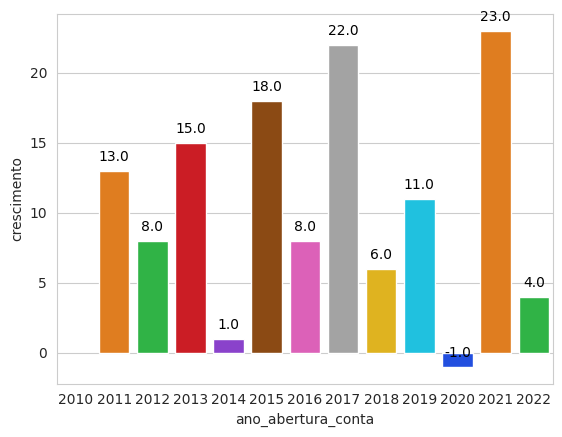

In [ ]:
with sns.axes_style('whitegrid'):

    ax = sns.barplot(x=df_anos_contas.index,
                y=df_anos_contas.crescimento,
                hue=df_anos_contas.index,
                legend=False,
                palette='bright')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

###KPI - Crescimento da agência (tempo em meses x nº de contas)

Indicador para analisar o crescimento da quantidade de contas por agência, considerando a idade em meses de abertura.

In [ ]:
kpi_crescimento = df_contas_total[['nome_completo','tempo_agencia_meses','num_conta']].groupby(['nome_completo','tempo_agencia_meses']).count()

kpi_crescimento['kpi_crescimento_mensal'] = kpi_crescimento['num_conta'] / kpi_crescimento.index.get_level_values('tempo_agencia_meses')
kpi_crescimento = kpi_crescimento.sort_values('kpi_crescimento_mensal', ascending=False)
kpi_crescimento

,,num_conta,kpi_crescimento_mensal
nome_completo,tempo_agencia_meses,,
Agência Digital - São Paulo/SP,107,460,4.299065
Agência Matriz - São Paulo/SP,174,119,0.683908
Agência Tatuapé - São Paulo/SP,169,101,0.597633
Agência Florianópolis - Florianópolis/SC,57,30,0.526316
Agência Campinas - Campinas/SP,148,76,0.513514
Agência Osasco - Osasco/SP,128,65,0.507812
Agência Porto Alegre - Porto Alegre/RS,127,61,0.480315
Agência Rio de Janeiro - Rio de Janeiro/RJ,111,52,0.468468
Agência Jardins - São Paulo/SP,78,30,0.384615


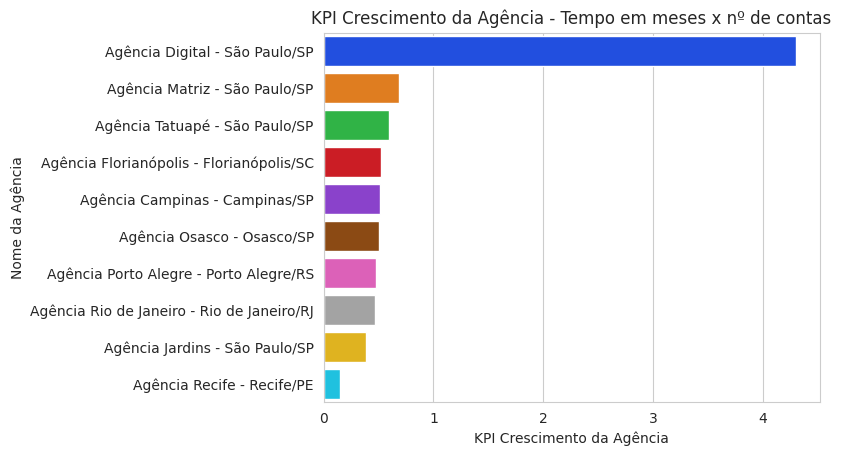

In [ ]:
  with sns.axes_style('whitegrid'):
        sns.barplot(
            x='kpi_crescimento_mensal',
            y='nome_completo',
            hue='nome_completo',
            data=kpi_crescimento.reset_index(),
            palette='bright',
            legend=False)
        plt.title('KPI Crescimento da Agência - Tempo em meses x nº de contas')
        plt.xlabel('KPI Crescimento da Agência')
        plt.ylabel('Nome da Agência')
plt.show()



Entendemos, portanto, a eficiente da agência digital e o potencial que esta pode atingir para alcançar novos clientes.



###Avaliação de atividades das Contas

<ipython-input-102-e6f77107e13d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


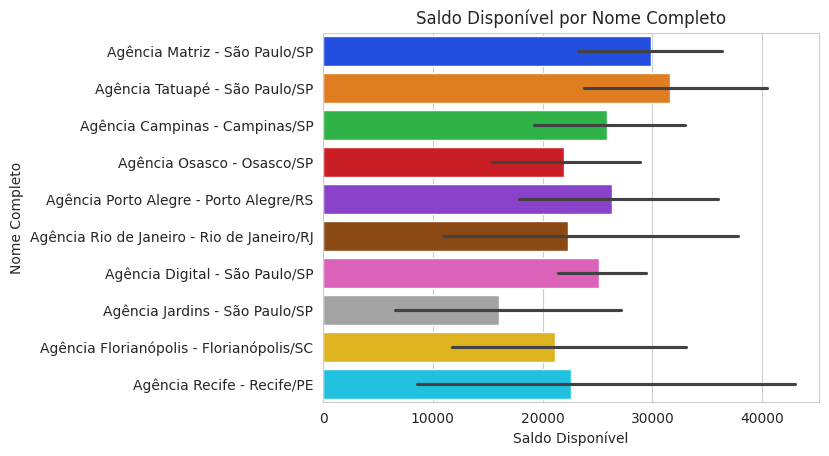

In [ ]:
with sns.axes_style('whitegrid'):
        sns.barplot(
            data=df_contas_total,
            x='saldo_disponivel',
            y='nome_completo',
            palette='bright'
        )
        plt.title('Saldo Disponível por Nome Completo')
        plt.xlabel('Saldo Disponível')
        plt.ylabel('Nome Completo')
        plt.show()

###Avaliação de última movimentação

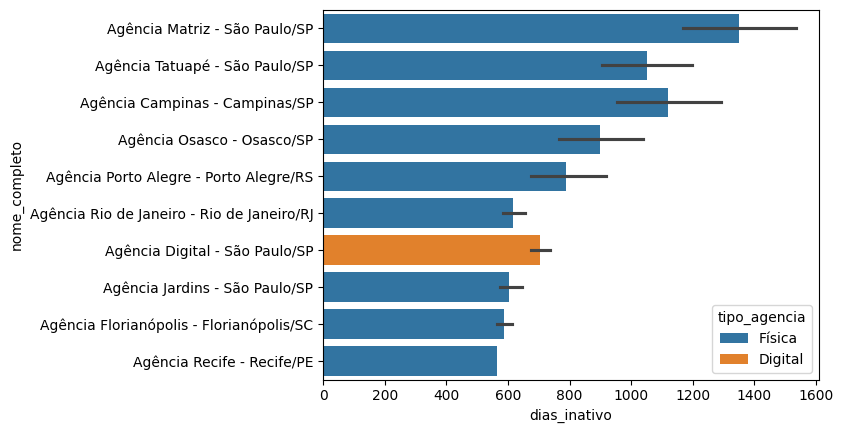

In [ ]:
sns.barplot(x = df_contas_total.dias_inativo,
            y = df_contas_total.nome_completo,
            hue = df_contas_total.tipo_agencia)
plt.show()

In [ ]:
df_agencia[['nome','data_abertura_agencia']].sort_values('data_abertura_agencia')

,nome,data_abertura_agencia
cod_agencia,,
1,Agência Matriz,2010-01-01
2,Agência Tatuapé,2010-06-14
3,Agência Campinas,2012-03-04
4,Agência Osasco,2013-11-06
5,Agência Porto Alegre,2013-12-01
6,Agência Rio de Janeiro,2015-04-01
7,Agência Digital,2015-08-01
8,Agência Jardins,2018-01-09
9,Agência Florianópolis,2019-10-09


Analisando os dados, chegamos a conclusão que o tempo inativo das contas está ligado com tempo de criação da conta. Como a agÊncia Matriz foi a primeira a ser criada, logo ela possui o maior numeros de contas com mais te sem atividades

#Propostas de Crédito

In [ ]:
#carregando os dados de propostas de crédito

df_credito = pd.read_csv("https://raw.githubusercontent.com/elisaramoss/analise_BanVic/main/banvic_data/propostas_credito.csv")

df_credito = df_credito.set_index(df_credito['cod_proposta'])
print(f'Quantidade de propostas de crédito cadastradas: {df_credito.shape[0]}')
df_credito.sample(10)

Quantidade de propostas de crédito cadastradas: 2000


,cod_proposta,cod_cliente,cod_colaborador,data_entrada_proposta,taxa_juros_mensal,valor_proposta,valor_financiamento,valor_entrada,valor_prestacao,quantidade_parcelas,carencia,status_proposta
cod_proposta,,,,,,,,,,,,
467,467,522,22,2010-04-07 07:20:32 UTC,0.0178,150255.604795,222421.41,72165.805205,9829.546739,18,6,Enviada
1893,1893,752,32,2012-03-30 03:11:02 UTC,0.0116,103142.283353,124541.11,21398.826647,1712.537176,104,0,Enviada
639,639,417,99,2019-12-20 13:15:29 UTC,0.0102,14928.431785,25153.30,10224.868215,415.341739,45,6,Em análise
819,819,101,62,2011-03-02 14:15:16 UTC,0.0166,8295.514176,14647.86,6352.345824,221.593855,59,0,Aprovada
1783,1783,440,88,2017-10-03 12:01:46 UTC,0.0088,180693.962514,237827.14,57133.177486,2981.161006,87,5,Enviada
1432,1432,715,3,2015-01-17 06:59:11 UTC,0.0098,119988.928608,183409.96,63421.031392,1735.952517,116,0,Validação documentos
1661,1661,757,94,2013-03-23 08:16:09 UTC,0.0113,11049.091476,15423.46,4374.368524,229.262373,70,6,Validação documentos
1753,1753,714,63,2014-08-20 01:52:14 UTC,0.0210,63938.033216,79170.55,15232.516784,2341.338137,41,1,Aprovada
1215,1215,682,65,2011-02-28 05:54:04 UTC,0.0103,35544.448998,46434.71,10890.261002,2569.554280,15,5,Aprovada


In [ ]:
#Verificando o status das propostas de crédito
df_credito.status_proposta.value_counts()

status_proposta
Enviada                 527
Aprovada                514
Validação documentos    491
Em análise              468
Name: count, dtype: int64

In [ ]:
# transformando a data de último lançamento em formato data
df_credito['data_entrada_proposta_parsed'] = pd.to_datetime(df_credito.data_entrada_proposta,
                                                            format='mixed')
df_credito = df_credito.drop('data_entrada_proposta', axis=1)

In [ ]:
df_credito.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   cod_proposta                  2000 non-null   int64              
 1   cod_cliente                   2000 non-null   int64              
 2   cod_colaborador               2000 non-null   int64              
 3   taxa_juros_mensal             2000 non-null   float64            
 4   valor_proposta                2000 non-null   float64            
 5   valor_financiamento           2000 non-null   float64            
 6   valor_entrada                 2000 non-null   float64            
 7   valor_prestacao               2000 non-null   float64            
 8   quantidade_parcelas           2000 non-null   int64              
 9   carencia                      2000 non-null   int64              
 10  status_proposta               2000 n

#Trasacoes

In [ ]:
#carregando os dados das transações
df_transacoes = pd.read_csv("https://raw.githubusercontent.com/elisaramoss/analise_BanVic/main/banvic_data/transacoes.csv")

print(f"Quantidade de transações: {df_transacoes.shape[0]}")

df_transacoes.head(10)

Quantidade de transações: 71999


,cod_transacao,num_conta,data_transacao,nome_transacao,valor_transacao
0,3100,256,2020-05-22 03:15:21 UTC,Saque,-130.0
1,28405,256,2021-06-29 11:52:38 UTC,Saque,-255.0
2,1776,512,2020-05-17 13:04:50 UTC,Saque,-250.0
3,14311,512,2020-09-06 02:55:34 UTC,Saque,-80.0
4,25012,512,2020-10-16 09:26:52 UTC,Saque,-475.0
5,26883,512,2020-11-09 00:47:27 UTC,Saque,-210.0
6,35017,512,2021-04-13 08:17:24 UTC,Saque,-50.0
7,46264,512,2021-05-01 06:25:50 UTC,Saque,-1160.0
8,21340,768,2020-02-14 21:42:15 UTC,Saque,-170.0
9,64259,1,2019-08-11 15:13:07 UTC,Saque,-245.0


In [ ]:
df_transacoes['data_transacao_parsed'] = pd.to_datetime(df_transacoes['data_transacao'],format='mixed')
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   cod_transacao          71999 non-null  int64              
 1   num_conta              71999 non-null  int64              
 2   data_transacao         71999 non-null  object             
 3   nome_transacao         71999 non-null  object             
 4   valor_transacao        71999 non-null  float64            
 5   data_transacao_parsed  71999 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 3.3+ MB


In [ ]:
df_transacoes.describe()

,cod_transacao,num_conta,valor_transacao
count,71999.000000,71999.000000,71999.000000
mean,36000.000000,499.486632,357.025159
std,20784.465353,288.907850,6550.523464
min,1.000000,1.000000,-132100.000000
25%,18000.500000,249.000000,-121.870000
50%,36000.000000,499.000000,-39.810000
75%,53999.500000,749.000000,-12.860000
max,71999.000000,999.000000,480270.000000


In [ ]:
df_anos_agencias = df_quant_contas[['nome_agencia','ano_abertura_agencia','num_conta']].groupby(['nome_agencia','ano_abertura_agencia']).count().sort_values('ano_abertura_agencia')
df_anos_agencias

,,num_conta
nome_agencia,ano_abertura_agencia,
Agência Matriz - São Paulo/SP,2010,119
Agência Tatuapé - São Paulo/SP,2010,101
Agência Campinas - Campinas/SP,2012,76
Agência Osasco - Osasco/SP,2013,65
Agência Porto Alegre - Porto Alegre/RS,2013,61
Agência Digital - São Paulo/SP,2015,460
Agência Rio de Janeiro - Rio de Janeiro/RJ,2015,52
Agência Jardins - São Paulo/SP,2018,30
Agência Florianópolis - Florianópolis/SC,2019,30


<ipython-input-201-46bd645f96a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='frequencia', y='nome_transacao', data=transacao_freq, palette='bright')


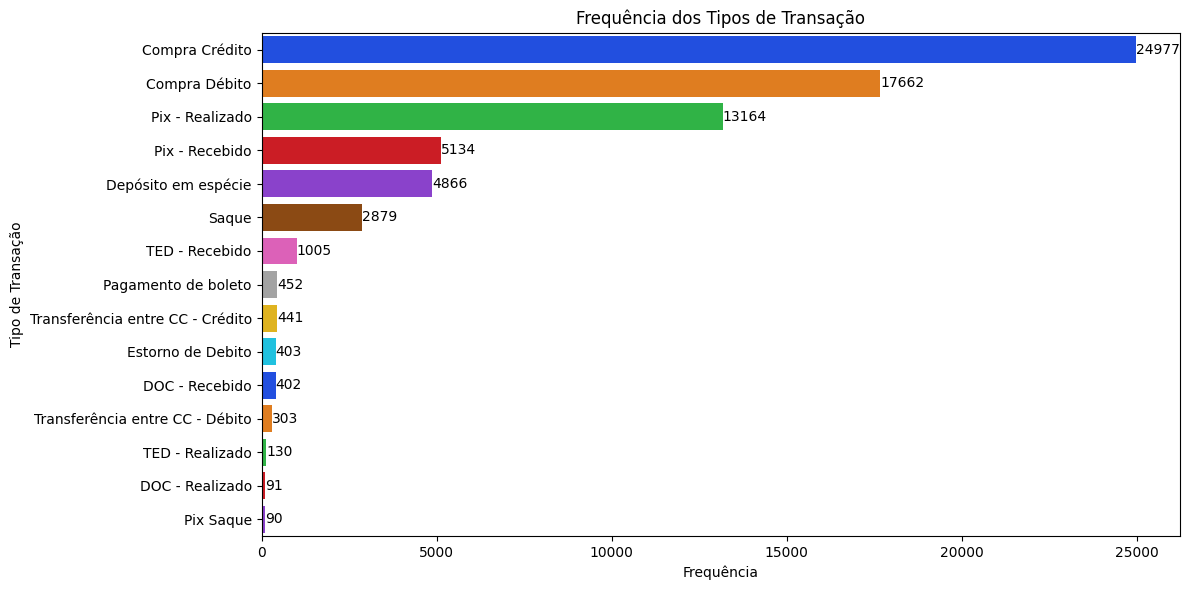

In [ ]:
# Frequência de cada tipo de transação
transacao_freq = df_transacoes['nome_transacao'].value_counts().reset_index()
transacao_freq.columns = ['nome_transacao', 'frequencia']

# Função para formatar os valores do eixo y
def formatacao_percentual(x, pos):
    return '{:.0f}%'.format(x * 100)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='frequencia', y='nome_transacao', data=transacao_freq, palette='bright')

for index, value in enumerate(transacao_freq['frequencia']):
    ax.text(value, index, f'{value}', color='black', ha="left", va="center")

plt.title('Frequência dos Tipos de Transação')
plt.xlabel('Frequência')
plt.ylabel('Tipo de Transação')
plt.tight_layout()
plt.show()

In [ ]:
 #Convertendo a coluna 'valor_transacao' para float
df_transacoes['valor_transacao'] = df_transacoes['valor_transacao'].astype(float)

# Convertendo a coluna 'data_transacao' para o tipo datetime com inferência automática
df_transacoes['data_transacao'] = pd.to_datetime(df_transacoes['data_transacao'], format='mixed', utc=True)

# Analisando o volume de transações por dia da semana
df_transacoes['dia_semana'] = df_transacoes['data_transacao'].dt.dayofweek

# Dicionário para mapear os dias da semana
dias_semana = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}

# Mapeando os números dos dias da semana para os nomes dos dias
df_transacoes['nome_dia_semana'] = df_transacoes['dia_semana'].map(dias_semana)

df_transacoes['dia_semana_nome'] = df_transacoes['dia_semana'].map(dias_semana)
volume_por_dia = df_transacoes.groupby('dia_semana_nome').size()
print(volume_por_dia)

dia_semana_nome
Domingo           7439
Quarta-feira      7883
Quinta-feira     21120
Segunda-feira     7176
Sexta-feira      13571
Sábado            7380
Terça-feira       7430
dtype: int64


###Gráfico Volume de Transações por Dia da Semana


<ipython-input-220-f2d1c00ee00d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_por_dia.index, y=volume_por_dia.values, palette='bright')


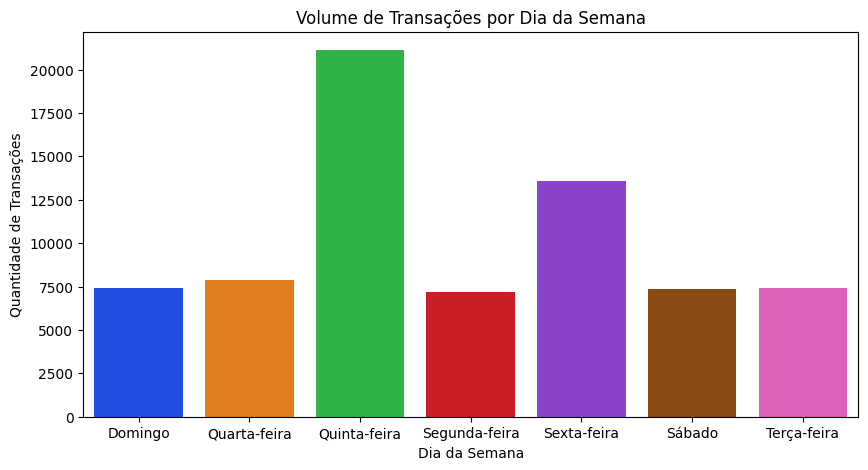

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=volume_por_dia.index, y=volume_por_dia.values, palette='bright')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Transações')
plt.title('Volume de Transações por Dia da Semana')
plt.show()




In [ ]:
# Analisando o valor movimentado por dia da semana
valor_por_dia = df_transacoes.groupby('dia_semana_nome')['valor_transacao'].mean()
print(valor_por_dia)

dia_semana_nome
Domingo          478.278010
Quarta-feira     455.344997
Quinta-feira     314.678548
Segunda-feira    420.631293
Sexta-feira      285.205057
Sábado           378.119313
Terça-feira      300.479167
Name: valor_transacao, dtype: float64


###Gráfico Valor Médio Movimentado por Dia da Semana

<ipython-input-226-217bc8a3903b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = valor_por_dia.index, y= valor_por_dia.values, palette='bright')


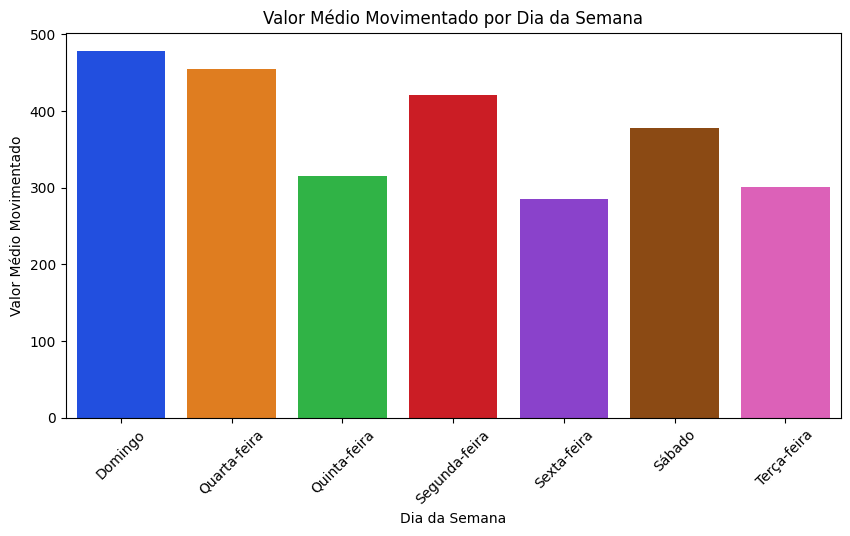

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x = valor_por_dia.index, y= valor_por_dia.values, palette='bright')
plt.xlabel('Dia da Semana')
plt.ylabel('Valor Médio Movimentado')
plt.title('Valor Médio Movimentado por Dia da Semana')
plt.xticks(rotation=45)
plt.show()


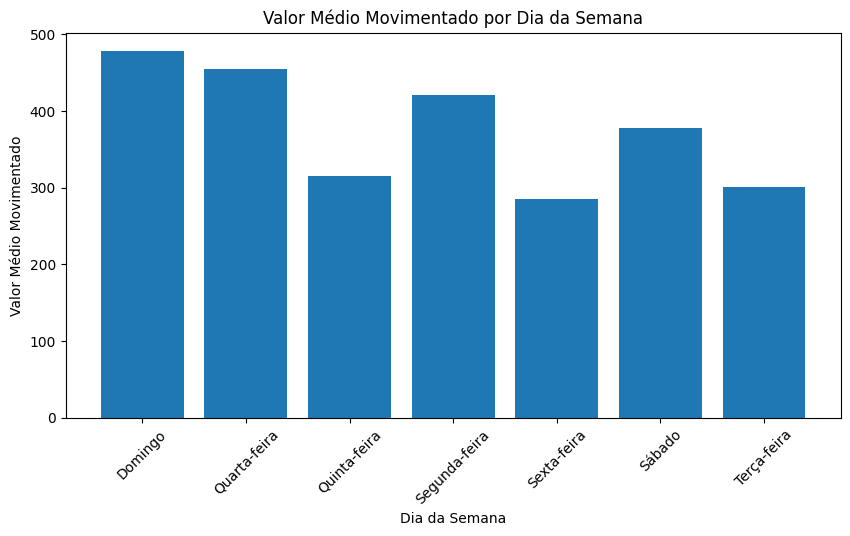

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(valor_por_dia.index, valor_por_dia.values)
plt.xlabel('Dia da Semana')
plt.ylabel('Valor Médio Movimentado')
plt.title('Valor Médio Movimentado por Dia da Semana')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Analisando o valor movimentado no início e final do mês
df_transacoes['inicio_mes'] = (df_transacoes['data_transacao'].dt.day <= 15).astype(int)
df_transacoes['final_mes'] = (df_transacoes['data_transacao'].dt.day > 15).astype(int)

valor_inicio_mes = df_transacoes[df_transacoes['inicio_mes'] == 1]['valor_transacao'].mean()
valor_final_mes = df_transacoes[df_transacoes['final_mes'] == 1]['valor_transacao'].mean()
print(f'Valor Médio Movimentado no Início do Mês: R$ {valor_inicio_mes:.2f}')
print(f'Valor Médio Movimentado no Final do Mês: R$ {valor_final_mes:.2f}')


Valor Médio Movimentado no Início do Mês: R$ 433.27
Valor Médio Movimentado no Final do Mês: R$ 317.20
